<a href="https://colab.research.google.com/github/jiin124/4th_kaggle_study/blob/main/5%EC%A3%BC%EC%B0%A8/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B5_%EB%B0%B0%EC%B6%94%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 배추가격 예측을 위한 데이터

▶ year - 년,월,일 정보

▶ avgTemp - 평균기온

▶ minTemp - 최저기온

▶ maxTemp - 최고기온

▶ rainFall - 강수량

▶ avgPrice - 배추가격


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']="b06d525a9f66198051ccb648b091778a"

In [4]:
!kaggle competitions download -c 2021-ai-w3-p1

  0% 0.00/79.6k [00:00<?, ?B/s]
100% 79.6k/79.6k [00:00<00:00, 28.8MB/s]
  0% 0.00/681 [00:00<?, ?B/s]
100% 681/681 [00:00<00:00, 1.75MB/s]
  0% 0.00/219 [00:00<?, ?B/s]
100% 219/219 [00:00<00:00, 570kB/s]


In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('submit_sample.csv')

In [6]:
train.head()

,year,avgTemp,minTemp,maxTemp,rainFall,avgPrice
0,20100101,-4.9,-11.0,0.9,0.0,2123
1,20100102,-3.1,-5.5,5.5,0.8,2123
2,20100103,-2.9,-6.9,1.4,0.0,2123
3,20100104,-1.8,-5.1,2.2,5.9,2020
4,20100105,-5.2,-8.7,-1.8,0.7,2060


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      2557 non-null   int64  
 1   avgTemp   2557 non-null   float64
 2   minTemp   2557 non-null   float64
 3   maxTemp   2557 non-null   float64
 4   rainFall  2557 non-null   float64
 5   avgPrice  2557 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 120.0 KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      24 non-null     int64  
 1   avgTemp   24 non-null     float64
 2   minTemp   24 non-null     float64
 3   maxTemp   24 non-null     float64
 4   rainFall  24 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.1 KB


In [9]:
train['year']=train['year'].astype('str')
test['year']=test['year'].astype('str')

In [10]:
train["month"]=train["year"].str[4:6]
train["day"]=train["year"].str[7]
train["year1"]=train["year"].str[0:4]


In [11]:
test["month"]=test["year"].str[4:6]
test["day"]=test["year"].str[7]
test["year1"]=test["year"].str[0:4]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      2557 non-null   object 
 1   avgTemp   2557 non-null   float64
 2   minTemp   2557 non-null   float64
 3   maxTemp   2557 non-null   float64
 4   rainFall  2557 non-null   float64
 5   avgPrice  2557 non-null   int64  
 6   month     2557 non-null   object 
 7   day       2557 non-null   object 
 8   year1     2557 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 179.9+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      24 non-null     object 
 1   avgTemp   24 non-null     float64
 2   minTemp   24 non-null     float64
 3   maxTemp   24 non-null     float64
 4   rainFall  24 non-null     float64
 5   month     24 non-null     object 
 6   day       24 non-null     object 
 7   year1     24 non-null     object 
dtypes: float64(4), object(4)
memory usage: 1.6+ KB


In [12]:
train.drop('year',axis=1,inplace=True)
test.drop('year',axis=1,inplace=True)

In [13]:
train['year1']=train['year1'].astype('int')
train['month']=train['month'].astype('int')
train['day']=train['day'].astype('int')

test['year1']=test['year1'].astype('int')
test['month']=test['month'].astype('int')
test['day']=test['day'].astype('int')

In [14]:
train.head()

,avgTemp,minTemp,maxTemp,rainFall,avgPrice,month,day,year1
0,-4.9,-11.0,0.9,0.0,2123,1,1,2010
1,-3.1,-5.5,5.5,0.8,2123,1,2,2010
2,-2.9,-6.9,1.4,0.0,2123,1,3,2010
3,-1.8,-5.1,2.2,5.9,2020,1,4,2010
4,-5.2,-8.7,-1.8,0.7,2060,1,5,2010


In [27]:
test.head()

,avgTemp,minTemp,maxTemp,rainFall,month,day,year1
0,4.0,-1.4,9.5,0.1,1,7,2017
1,-1.7,-5.4,1.4,3.3,1,0,2017
2,1.4,-2.0,5.0,0.0,2,3,2017
3,3.6,-2.5,11.1,0.1,2,7,2017
4,5.0,-1.6,11.3,0.0,3,9,2017


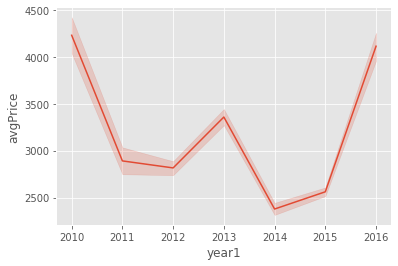

In [ ]:
sns.lineplot(data=train,x='year1',y='avgPrice')

2010년과 2016년에 무슨일이..! 배춧값이 엄청나다!

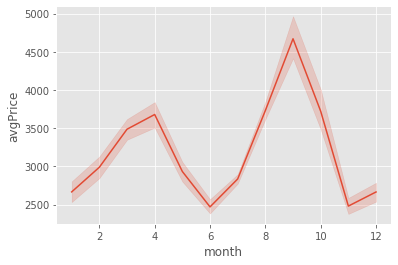

In [ ]:
sns.lineplot(data=train,x='month',y='avgPrice')

왜 9월에 배춧값이 보통 높은거지

In [ ]:
train.columns

Index(['avgTemp', 'minTemp', 'maxTemp', 'rainFall', 'avgPrice', 'month', 'day',
       'year1'],
      dtype='object')

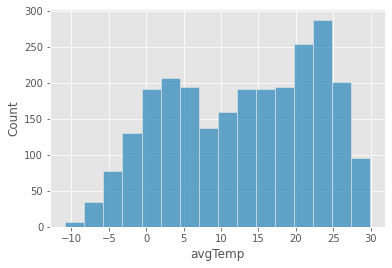

In [ ]:
sns.histplot(data=train,x='avgTemp')

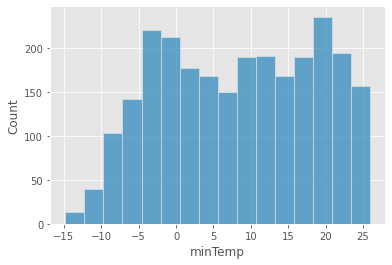

In [ ]:
sns.histplot(data=train,x='minTemp')

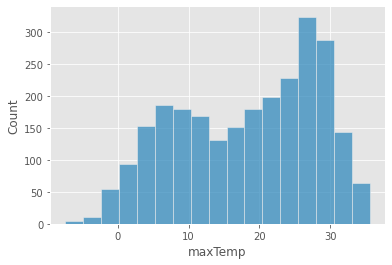

In [ ]:
sns.histplot(data=train,x='maxTemp')


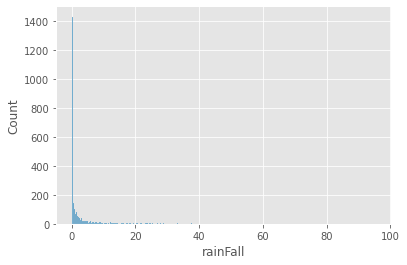

In [ ]:
sns.histplot(data=train,x='rainFall')

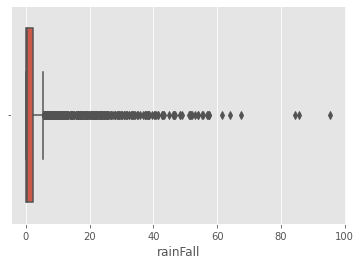

In [ ]:
sns.boxplot(data=train,x='rainFall')

이상치를 없애야 할까..?

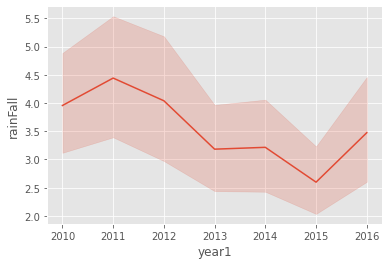

In [ ]:
sns.lineplot(data=train,
             x='year1',
             y='rainFall')

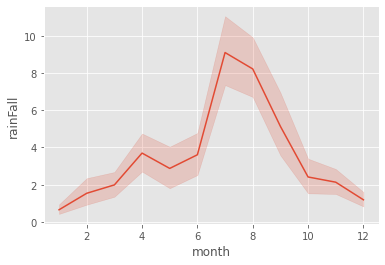

In [ ]:
sns.lineplot(data=train,
             x='month',
             y='rainFall')

강수량과, 배춧값은 어느정도 연관성이 있어보인다. 강수량이 6월에서 8월 사이에 장마로 많은데 배춧값은 9월쯤에 가장 비싸다

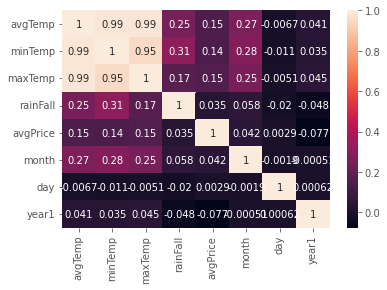

In [ ]:
plt.figure()
sns.heatmap(train.corr(),annot=True)

## Matrix Data Representation

In [15]:
import torch
import torch.optim as optim

torch.manual_seed(1)

In [28]:
xt=train.drop('avgPrice',axis=1)
yt=train['avgPrice']
xt=test

In [29]:
x_train = torch.Tensor(np.array(xt))
y_train = torch.Tensor(np.array(yt))
x_test = torch.Tensor(np.array(xt))

In [45]:
# 모델 초기화
W = torch.zeros((7,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.0000001)


nb_epochs = 10000

for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # Matrix 연산!!
    hypothesis = x_train.matmul(W) + b # or .mm or @
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/10000 Cost: 12013343.000000
Epoch  100/10000 Cost: 1810349.750000
Epoch  200/10000 Cost: 1810349.875000
Epoch  300/10000 Cost: 1810349.750000
Epoch  400/10000 Cost: 1810349.875000
Epoch  500/10000 Cost: 1810349.875000
Epoch  600/10000 Cost: 1810349.875000
Epoch  700/10000 Cost: 1810349.750000
Epoch  800/10000 Cost: 1810349.750000
Epoch  900/10000 Cost: 1810349.750000
Epoch 1000/10000 Cost: 1810349.750000
Epoch 1100/10000 Cost: 1810349.875000
Epoch 1200/10000 Cost: 1810349.750000
Epoch 1300/10000 Cost: 1810349.750000
Epoch 1400/10000 Cost: 1810349.750000
Epoch 1500/10000 Cost: 1810349.750000
Epoch 1600/10000 Cost: 1810349.750000
Epoch 1700/10000 Cost: 1810349.750000
Epoch 1800/10000 Cost: 1810349.875000
Epoch 1900/10000 Cost: 1810349.750000
Epoch 2000/10000 Cost: 1810349.750000
Epoch 2100/10000 Cost: 1810349.750000
Epoch 2200/10000 Cost: 1810349.750000
Epoch 2300/10000 Cost: 1810349.750000
Epoch 2400/10000 Cost: 1810349.750000
Epoch 2500/10000 Cost: 1810349.750000
Epoch 2600/

In [46]:
predict = x_test.matmul(W) + b

In [47]:
sample['Expected']=predict.detach().numpy()

In [48]:
sample

,Id,Expected
0,0,3194.025635
1,1,3193.877930
2,2,3193.952881
3,3,3194.042236
4,4,3194.066650
5,5,3194.104980
6,6,3194.170410
7,7,3194.318604
8,8,3194.291504
9,9,3194.364014


In [38]:
sample.to_csv('sample.csv',index=False)